# **K Means Clustering**

K Means Clustering is a unsupervised learning algorithm, based on to solve the problems we face with unlabeled data by packaging similar data points into one cluster. <br>
The algorithm works as follows:  <br>
1. First, we randomly initialize k points, called cluster centroids.
2. Than, We categorize each item to its closest mean (calculated using methods like Euclidean Distance), and we update the mean's coordinates, which are the averages of the items categorized in that cluster so far.
3. Repeat the process for a given number of iterations and at the end, we have our clusters.

In [ ]:
import numpy as np

class SimpleKMeans:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.cluster_centers_ = None
        self.labels_ = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Initialize centroids randomly from the data points
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.cluster_centers_ = X[random_indices]

        for i in range(self.max_iter):
            # Assign labels based on closest centroid
            self.labels_ = self._assign_labels(X)

            # Compute new centroids
            new_centroids = self._compute_centroids(X)

            # Check for convergence
            if np.all(np.abs(new_centroids - self.cluster_centers_) < self.tol):
                break

            self.cluster_centers_ = new_centroids

    def _assign_labels(self, X):
        # Compute distances to centroids
        distances = self._compute_distances(X)
        # Assign labels based on closest centroid
        return np.argmin(distances, axis=1)

    def _compute_centroids(self, X):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k] = X[self.labels_ == k].mean(axis=0)
        return centroids

    def _compute_distances(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            distances[:, k] = np.linalg.norm(X - self.cluster_centers_[k], axis=1)
        return distances

    def predict(self, X):
        return self._assign_labels(X)

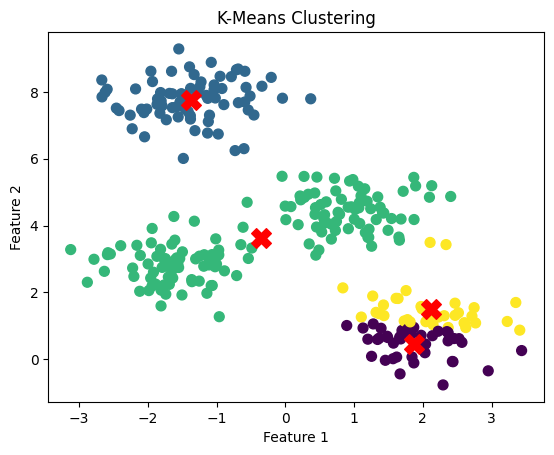

In [ ]:
if __name__ == "__main__":
    from sklearn.datasets import make_blobs
    import matplotlib.pyplot as plt

    X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    kmeans = SimpleKMeans(n_clusters=4, max_iter=300, tol=1e-4)
    kmeans.fit(X)

    y_pred = kmeans.predict(X)

    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
    plt.title("K-Means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()